In [1]:
# | eval: false
import pandas as pd
from datasets import Dataset, DatasetDict, load_dataset, load_from_disk

In [2]:
# | eval: false
path_ = '/home/stirunag/work/github/ML4-legal-documents/judgements_xml/'
dataset_path = path_+'en_judgements_dataset'
ds = load_from_disk(dataset_path)

df = ds.to_pandas()

In [3]:
df.head()

,_id,citation,signature,date,publicationDate,type,excerpt,content,judges,caseNumbers,citation_references,legislation,file_name,appeal_type,appeal_outcome,xml_uri,uri
0,ab0224364e4cf6562c82f8861d5268d4fa22b2ec45e0f7...,[2008] EWCA Crim 2952,EWCA_Crim_2952,None,2008-11-26,crown_court,No. 2008/03296/A9 2008/03350/A9 & 2008/03349/A...,No.\n2008/03296/A9\n2008/03350/A9\n&\n2008/033...,"[LORD JUSTICE TOULSON, MR JUSTICE MADDISON]","[2008/03296/A9, 2008/03349/A9, 2008/03350/A9]",None,None,2008_11_26-1736.xml,None,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
1,d4630d93258ea51ecff4bc4015443b4eecf8d9b2e5b7c5...,[2006] EWCA Crim 3187,EWCA_Crim_3187,None,2006-12-19,supreme_court,Neutral Citation Number: [2006] EWCA Crim 3187...,Neutral Citation Number:\n[2006] EWCA Crim 318...,"[LORD JUSTICE PILL, MR JUSTICE HODGE]",[2003/06451/C4],None,None,2006_12_19-996.xml,conviction,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
2,37183a714b626cfe98081ac0250c804f992f340281f6d2...,[2012] EWCA Crim 1840,EWCA_Crim_1840,None,2012-08-08,crown_court,Neutral Citation Number: [2012] EWCA Crim 1840...,Neutral Citation Number:\n[2012] EWCA Crim 184...,"[LORD JUSTICE DAVIS, MR JUSTICE BURTON, MR JUS...",[201106042D2],"[[2008] UKHL 28, [2008] UKHL 29]","[that Act, Section 95(1), s.95(1), s.97, s.76(...",2012_08_08-3035.xml,None,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
3,b41933b19505ab8767ce30faf8db9524f737ec5ac2c17e...,[2014] EWCA Crim 1730,EWCA_Crim_1730,None,2014-07-08,crown_court,Neutral Citation Number: [2014] EWCA Crim 1730...,Neutral Citation Number:\n[2014] EWCA Crim 173...,"[LORD JUSTICE TREACY, MR JUSTICE GRIFFITH WILL...",[201300932 C3],None,None,2014_07_08-3443.xml,None,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...
4,418382a2a6c0c32d3d2bd4cb7b39e1ba259dc6bf56a78e...,[2018] EWCA Crim 2189,EWCA_Crim_2189,None,2018-07-26,crown_court,No: 201802356 A2 Neutral Citation Number: [201...,No:\n201802356 A2\nNeutral Citation Number:\n[...,"[LORD JUSTICE SIMON, MRS JUSTICE CARR DBE]",[201802356 A2],None,None,2018_07_26-4369.xml,None,allowed,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...


In [4]:
# Convert publicationDate to datetime
df['publicationDate'] = pd.to_datetime(df['publicationDate'])

# Extract the publicationYear
df['publicationYear'] = df['publicationDate'].dt.year

# Calculate the length of tokens in content
df['contentTokenLength'] = df['content'].apply(lambda x: len(x.split()))

# Display the updated DataFrame
df.head()

,_id,citation,signature,date,publicationDate,type,excerpt,content,judges,caseNumbers,citation_references,legislation,file_name,appeal_type,appeal_outcome,xml_uri,uri,publicationYear,contentTokenLength
0,ab0224364e4cf6562c82f8861d5268d4fa22b2ec45e0f7...,[2008] EWCA Crim 2952,EWCA_Crim_2952,None,2008-11-26,crown_court,No. 2008/03296/A9 2008/03350/A9 & 2008/03349/A...,No.\n2008/03296/A9\n2008/03350/A9\n&\n2008/033...,"[LORD JUSTICE TOULSON, MR JUSTICE MADDISON]","[2008/03296/A9, 2008/03349/A9, 2008/03350/A9]",None,None,2008_11_26-1736.xml,None,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...,2008,2229
1,d4630d93258ea51ecff4bc4015443b4eecf8d9b2e5b7c5...,[2006] EWCA Crim 3187,EWCA_Crim_3187,None,2006-12-19,supreme_court,Neutral Citation Number: [2006] EWCA Crim 3187...,Neutral Citation Number:\n[2006] EWCA Crim 318...,"[LORD JUSTICE PILL, MR JUSTICE HODGE]",[2003/06451/C4],None,None,2006_12_19-996.xml,conviction,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...,2006,3681
2,37183a714b626cfe98081ac0250c804f992f340281f6d2...,[2012] EWCA Crim 1840,EWCA_Crim_1840,None,2012-08-08,crown_court,Neutral Citation Number: [2012] EWCA Crim 1840...,Neutral Citation Number:\n[2012] EWCA Crim 184...,"[LORD JUSTICE DAVIS, MR JUSTICE BURTON, MR JUS...",[201106042D2],"[[2008] UKHL 28, [2008] UKHL 29]","[that Act, Section 95(1), s.95(1), s.97, s.76(...",2012_08_08-3035.xml,None,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...,2012,7199
3,b41933b19505ab8767ce30faf8db9524f737ec5ac2c17e...,[2014] EWCA Crim 1730,EWCA_Crim_1730,None,2014-07-08,crown_court,Neutral Citation Number: [2014] EWCA Crim 1730...,Neutral Citation Number:\n[2014] EWCA Crim 173...,"[LORD JUSTICE TREACY, MR JUSTICE GRIFFITH WILL...",[201300932 C3],None,None,2014_07_08-3443.xml,None,None,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...,2014,3515
4,418382a2a6c0c32d3d2bd4cb7b39e1ba259dc6bf56a78e...,[2018] EWCA Crim 2189,EWCA_Crim_2189,None,2018-07-26,crown_court,No: 201802356 A2 Neutral Citation Number: [201...,No:\n201802356 A2\nNeutral Citation Number:\n[...,"[LORD JUSTICE SIMON, MRS JUSTICE CARR DBE]",[201802356 A2],None,None,2018_07_26-4369.xml,None,allowed,https://caselaw.nationalarchives.gov.uk/ewca/c...,https://caselaw.nationalarchives.gov.uk/id/ewc...,2018,1879


In [5]:
import matplotlib.pyplot as plt
import os

In [6]:
# Create the 'images' directory if it does not exist
os.makedirs('images', exist_ok=True)

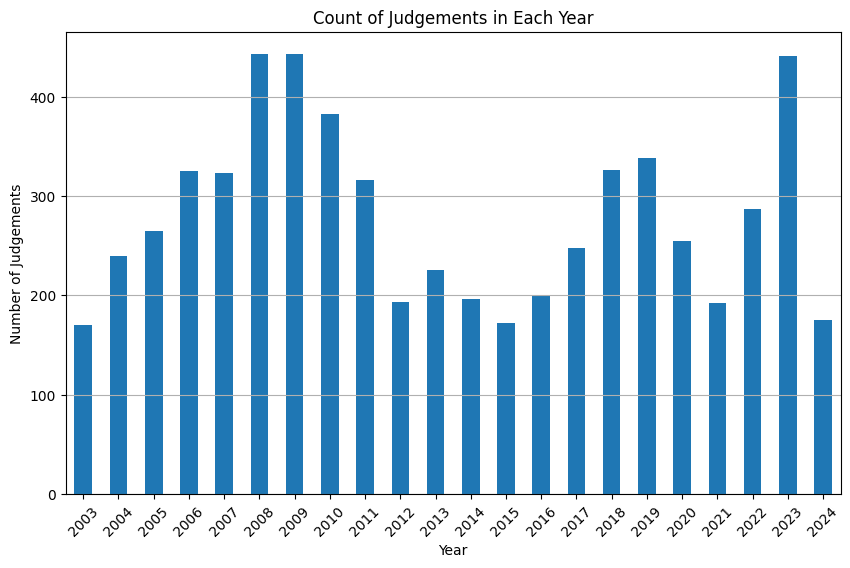

In [7]:
# Plotting
publication_counts = df['publicationYear'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
publication_counts.plot(kind='bar')
plt.title('Count of Judgements in Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Judgements')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Save the plot as a PNG file
plt.savefig('images/judgements_per_year.png', format='png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

<Figure size 1200x800 with 0 Axes>

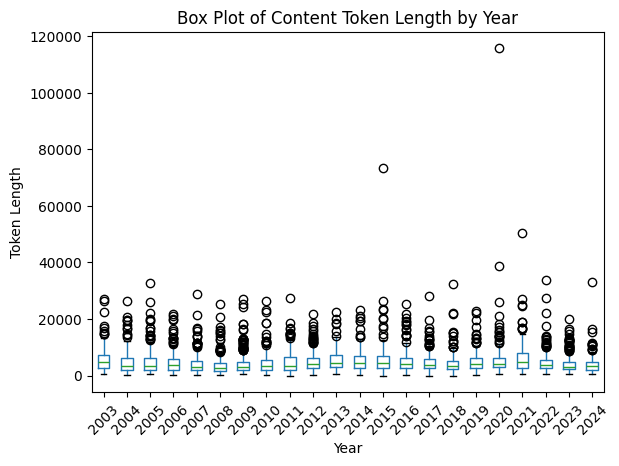

In [8]:
# Plotting the box plot for content token length by year
plt.figure(figsize=(12, 8))
df.boxplot(column='contentTokenLength', by='publicationYear', grid=False)
plt.title('Box Plot of Content Token Length by Year')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Year')
plt.ylabel('Token Length')
plt.xticks(rotation=45)

# Save the plot as a PNG file
plt.savefig('images/box_token_length.png', format='png', dpi=300, bbox_inches='tight')
# Show plot
plt.show()

In [9]:
cases_already_annotated = ['https://caselaw.nationalarchives.gov.uk/ewca/crim/2003/3',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2003/2243',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2004/2278',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2005/1983',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2006/694',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2006/1155',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2007/1530',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2008/553',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2009/1431',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2010/712',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2012/720',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2013/801',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2013/1649',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2016/52',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2017/1851',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2018/1766',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2019/362',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2020/499',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2022/83',
'https://caselaw.nationalarchives.gov.uk/ewca/crim/2023/231']

In [12]:
# Function to extract closest rows for min statistic
def extract_min_stat_rows(df):
    return df[df['contentTokenLength'] == df['contentTokenLength'].min()].iloc[0]

# Group by year and apply the function
result = []
for year, group in df.groupby('publicationYear'):
    row = extract_min_stat_rows(group)
    result.append({
        'publicationYear': year,
        'stat': 'min',
        'uri': row['uri']
    })

# Convert the result to a DataFrame
min_df = pd.DataFrame(result)

min_df['uri'] = min_df['uri'].str.replace('/id', '', regex=False)

min_df


,publicationYear,stat,uri
0,2003,min,https://caselaw.nationalarchives.gov.uk/ewca/c...
1,2004,min,https://caselaw.nationalarchives.gov.uk/ewca/c...
2,2005,min,https://caselaw.nationalarchives.gov.uk/ewca/c...
3,2006,min,https://caselaw.nationalarchives.gov.uk/ewca/c...
4,2007,min,https://caselaw.nationalarchives.gov.uk/ewca/c...
5,2008,min,https://caselaw.nationalarchives.gov.uk/ewca/c...
6,2009,min,https://caselaw.nationalarchives.gov.uk/ewca/c...
7,2010,min,https://caselaw.nationalarchives.gov.uk/ewca/c...
8,2011,min,https://caselaw.nationalarchives.gov.uk/ewca/c...
9,2012,min,https://caselaw.nationalarchives.gov.uk/ewca/c...


In [13]:
cases_to_be_removed = list(set(cases_already_annotated) | set(min_df['uri'].tolist()))
cases_to_be_removed

['https://caselaw.nationalarchives.gov.uk/ewca/crim/2013/1649',
 'https://caselaw.nationalarchives.gov.uk/ewca/crim/2020/499',
 'https://caselaw.nationalarchives.gov.uk/ewca/crim/2006/1155',
 'https://caselaw.nationalarchives.gov.uk/ewca/crim/2004/1717',
 'https://caselaw.nationalarchives.gov.uk/ewca/crim/2019/362',
 'https://caselaw.nationalarchives.gov.uk/ewca/crim/2008/3177',
 'https://caselaw.nationalarchives.gov.uk/ewca/crim/2024/36',
 'https://caselaw.nationalarchives.gov.uk/ewca/crim/2015/431',
 'https://caselaw.nationalarchives.gov.uk/ewca/crim/2006/694',
 'https://caselaw.nationalarchives.gov.uk/ewca/crim/2012/720',
 'https://caselaw.nationalarchives.gov.uk/ewca/crim/2007/1530',
 'https://caselaw.nationalarchives.gov.uk/ewca/crim/2004/2278',
 'https://caselaw.nationalarchives.gov.uk/ewca/crim/2011/1695',
 'https://caselaw.nationalarchives.gov.uk/ewca/crim/2016/1521',
 'https://caselaw.nationalarchives.gov.uk/ewca/crim/2010/712',
 'https://caselaw.nationalarchives.gov.uk/ewca/c

In [14]:
len(df)

6154

In [16]:
df['uri'] = df['uri'].str.replace('/id', '', regex=False)
df_filtered = df[~df['uri'].isin(cases_to_be_removed)]
len(df_filtered)

6114

In [17]:
df_filtered['publicationYear'].unique()

array([2008, 2006, 2012, 2014, 2018, 2020, 2022, 2009, 2023, 2011, 2015,
       2010, 2024, 2007, 2004, 2013, 2017, 2005, 2016, 2003, 2019, 2021],
      dtype=int32)

In [18]:
len(df_filtered['publicationYear'].unique())

22

In [19]:
rows_per_year = max(int(800 / len(df_filtered['publicationYear'].unique())), 1)
rows_per_year

36

In [20]:
df_filtered = df_filtered[['publicationYear', 'citation', 'uri']]
df_filtered

,publicationYear,citation,uri
0,2008,[2008] EWCA Crim 2952,https://caselaw.nationalarchives.gov.uk/ewca/c...
1,2006,[2006] EWCA Crim 3187,https://caselaw.nationalarchives.gov.uk/ewca/c...
2,2012,[2012] EWCA Crim 1840,https://caselaw.nationalarchives.gov.uk/ewca/c...
3,2014,[2014] EWCA Crim 1730,https://caselaw.nationalarchives.gov.uk/ewca/c...
4,2018,[2018] EWCA Crim 2189,https://caselaw.nationalarchives.gov.uk/ewca/c...
...,...,...,...
6149,2018,[2018] EWCA Crim 2743,https://caselaw.nationalarchives.gov.uk/ewca/c...
6150,2004,[2004] EWCA Crim 7,https://caselaw.nationalarchives.gov.uk/ewca/c...
6151,2010,[2010] EWCA Crim 2144,https://caselaw.nationalarchives.gov.uk/ewca/c...
6152,2005,[2005] EWCA Crim 859,https://caselaw.nationalarchives.gov.uk/ewca/c...


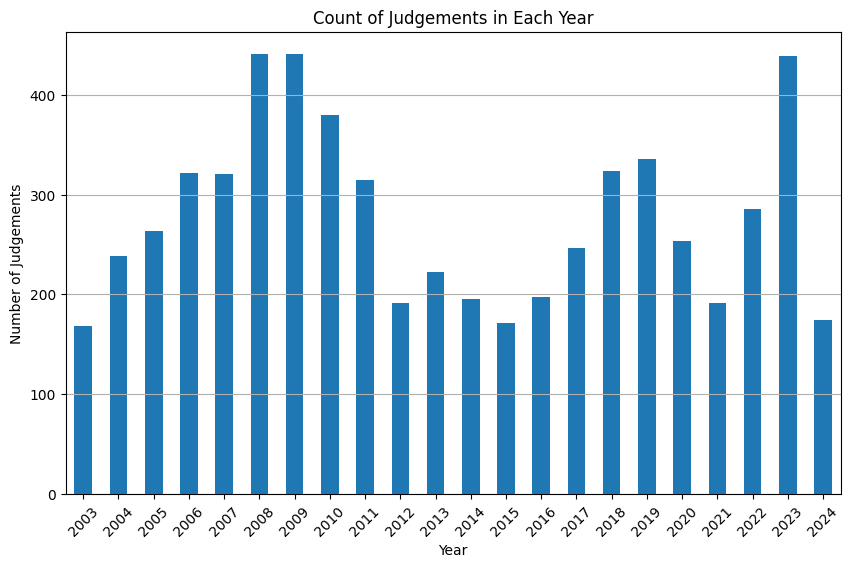

publicationYear
2003    168
2004    238
2005    263
2006    322
2007    321
2008    441
2009    441
2010    380
2011    315
2012    191
2013    222
2014    195
2015    171
2016    197
2017    246
2018    324
2019    336
2020    253
2021    191
2022    286
2023    439
2024    174
Name: count, dtype: int64

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting
publication_counts = df_filtered['publicationYear'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
publication_counts.plot(kind='bar')
plt.title('Count of Judgements in Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Judgements')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Save the plot as a PNG file
plt.savefig('images/final_judgements_per_year.png', format='png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

publication_counts


In [58]:
len(df_filtered['uri'].unique())

6114

In [24]:
import pandas as pd

# Assuming df_filtered is your dataframe
# Create a new column 'row_id' to ensure uniqueness after sampling
df_filtered['row_id'] = df_filtered.index

# Calculate the proportion of rows per year
year_counts = df_filtered['publicationYear'].value_counts().sort_index()
total_rows = len(df_filtered)
proportions = year_counts / total_rows

# Calculate the number of rows to sample per year for each new dataframe
samples_per_year = (proportions * 800).round().astype(int)



In [25]:
proportions

publicationYear
2003    0.027478
2004    0.038927
2005    0.043016
2006    0.052666
2007    0.052502
2008    0.072130
2009    0.072130
2010    0.062152
2011    0.051521
2012    0.031240
2013    0.036310
2014    0.031894
2015    0.027969
2016    0.032221
2017    0.040236
2018    0.052993
2019    0.054956
2020    0.041380
2021    0.031240
2022    0.046778
2023    0.071802
2024    0.028459
Name: count, dtype: float64

In [26]:
samples_per_year

publicationYear
2003    22
2004    31
2005    34
2006    42
2007    42
2008    58
2009    58
2010    50
2011    41
2012    25
2013    29
2014    26
2015    22
2016    26
2017    32
2018    42
2019    44
2020    33
2021    25
2022    37
2023    57
2024    23
Name: count, dtype: int64

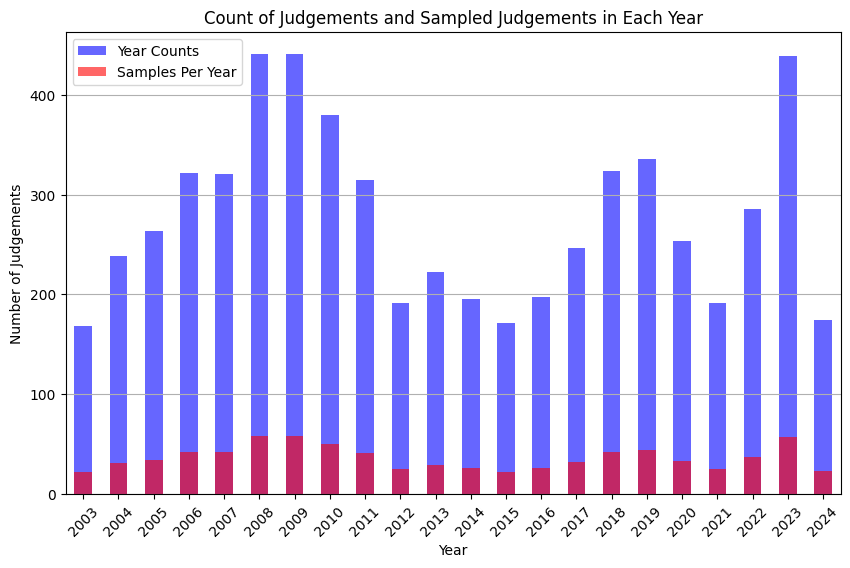

In [28]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot the year counts as bars
year_counts.plot(kind='bar', color='blue', alpha=0.6, label='Year Counts')

# Overlay the samples_per_year as a line plot
samples_per_year.plot(kind='bar', color='red', alpha=0.6, label='Samples Per Year')

plt.title('Count of Judgements and Sampled Judgements in Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Judgements')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()

# Show plot
plt.show()

In [59]:
# # Function to sample rows based on the calculated proportions
# def stratified_sample(df, samples_per_year):
#     sampled_df = pd.DataFrame()
#     for year, n_samples in samples_per_year.items():
#         sampled_df = pd.concat([sampled_df, df[df['publicationYear'] == year].sample(n=n_samples, random_state=1)])
#     return sampled_df

# # Create Charis_df and Vili_df with 800 unique rows each
# Charis_df = stratified_sample(df_filtered, samples_per_year)
# Vili_df = stratified_sample(df_filtered.drop(Charis_df['row_id']), samples_per_year)

# # Drop the 'row_id' column as it's no longer needed
# Charis_df.drop(columns=['row_id'], inplace=True)
# Vili_df.drop(columns=['row_id'], inplace=True)

# # Reset index for the new dataframes
# Charis_df.reset_index(drop=True, inplace=True)
# Vili_df.reset_index(drop=True, inplace=True)

import pandas as pd

# Add 'row_id' to keep track of the original index
df_filtered['row_id'] = df_filtered.index

# Calculate the proportion of rows per year
year_counts = df_filtered['publicationYear'].value_counts().sort_index()
total_rows = len(df_filtered)
proportions = year_counts / total_rows

# Calculate the number of rows to sample per year for each new dataframe
samples_per_year = (proportions * 800).round().astype(int)

# Function to sample rows based on the calculated proportions
def stratified_sample(df, samples_per_year):
    sampled_df_list = []
    for year, n_samples in samples_per_year.items():
        sampled_rows = df[df['publicationYear'] == year].sample(n=n_samples, random_state=1)
        sampled_df_list.append(sampled_rows)
    sampled_df = pd.concat(sampled_df_list).reset_index(drop=True)
    return sampled_df

# Create Charis_df with 800 unique rows
Charis_df = stratified_sample(df_filtered, samples_per_year)

# Remove duplicates within Charis_df
Charis_df = Charis_df.drop_duplicates(subset='uri').reset_index(drop=True)

# Adjust the samples_per_year to account for the actual number of rows in Charis_df
samples_per_year_adjusted = Charis_df['publicationYear'].value_counts().sort_index()

# Exclude the sampled indices from the original dataframe to create Vili_df
remaining_df = df_filtered.loc[~df_filtered['row_id'].isin(Charis_df['row_id'])]

# Create Vili_df with 800 unique rows
Vili_df = stratified_sample(remaining_df, samples_per_year_adjusted)

# Remove duplicates within Vili_df
Vili_df = Vili_df.drop_duplicates(subset='uri').reset_index(drop=True)

# Remove any duplicates between Charis_df and Vili_df
combined_uris = set(Charis_df['uri']).intersection(set(Vili_df['uri']))
Vili_df = Vili_df[~Vili_df['uri'].isin(combined_uris)].reset_index(drop=True)

# Function to ensure unique years are interleaved
def interleave_years(df):
    years = df['publicationYear'].unique()
    interleaved_df = pd.DataFrame()
    while not df.empty:
        for year in years:
            year_df = df[df['publicationYear'] == year].head(1)
            interleaved_df = pd.concat([interleaved_df, year_df])
            df = df.drop(year_df.index)
    return interleaved_df.reset_index(drop=True)

Charis_df = interleave_years(Charis_df)
Vili_df = interleave_years(Vili_df)

# Check the number of unique rows in each dataframe
print(f'Number of unique rows in Charis_df: {Charis_df.shape[0]}')
print(f'Number of unique rows in Vili_df: {Vili_df.shape[0]}')


Number of unique rows in Charis_df: 799
Number of unique rows in Vili_df: 799


In [60]:
def check_for_duplicates(Charis_df, Vili_df, unique_column='uri'):
    # Check for duplicates within Charis_df
    charis_duplicates = Charis_df[Charis_df.duplicated(subset=unique_column, keep=False)]
    if not charis_duplicates.empty:
        print("Duplicates within Charis_df:")
        print(charis_duplicates)
    else:
        print("No duplicates within Charis_df.")

    # Check for duplicates within Vili_df
    vili_duplicates = Vili_df[Vili_df.duplicated(subset=unique_column, keep=False)]
    if not vili_duplicates.empty:
        print("Duplicates within Vili_df:")
        print(vili_duplicates)
    else:
        print("No duplicates within Vili_df.")

    # Check for duplicates across Charis_df and Vili_df
    combined_df = pd.concat([Charis_df, Vili_df])
    combined_duplicates = combined_df[combined_df.duplicated(subset=unique_column, keep=False)]
    if not combined_duplicates.empty:
        print("Duplicates across Charis_df and Vili_df:")
        print(combined_duplicates)
    else:
        print("No duplicates across Charis_df and Vili_df.")

# Run the test
check_for_duplicates(Charis_df, Vili_df, unique_column='uri')


No duplicates within Charis_df.
No duplicates within Vili_df.
No duplicates across Charis_df and Vili_df.


In [61]:
Charis_df

,publicationYear,citation,uri,row_id
0,2003,[2003] EWCA Crim 2668,https://caselaw.nationalarchives.gov.uk/ewca/c...,1387
1,2004,[2004] EWCA Crim 1358,https://caselaw.nationalarchives.gov.uk/ewca/c...,5334
2,2005,[2005] EWCA Crim 190,https://caselaw.nationalarchives.gov.uk/ewca/c...,2045
3,2006,[2006] EWCA Crim 2203,https://caselaw.nationalarchives.gov.uk/ewca/c...,5217
4,2007,[2007] EWCA Crim 3227,https://caselaw.nationalarchives.gov.uk/ewca/c...,4934
...,...,...,...,...
794,2008,[2008] EWCA Crim 594,https://caselaw.nationalarchives.gov.uk/ewca/c...,3797
795,2009,[2009] EWCA Crim 2856,https://caselaw.nationalarchives.gov.uk/ewca/c...,3851
796,2023,[2023] EWCA Crim 1656,https://caselaw.nationalarchives.gov.uk/ewca/c...,3037
797,2008,[2008] EWCA Crim 3258,https://caselaw.nationalarchives.gov.uk/ewca/c...,3893


In [62]:
Vili_df

,publicationYear,citation,uri,row_id
0,2003,[2003] EWCA Crim 1765,https://caselaw.nationalarchives.gov.uk/ewca/c...,3897
1,2004,[2004] EWCA Crim 1528,https://caselaw.nationalarchives.gov.uk/ewca/c...,5517
2,2005,[2005] EWCA Crim 2750,https://caselaw.nationalarchives.gov.uk/ewca/c...,865
3,2006,[2006] EWCA Crim 2869,https://caselaw.nationalarchives.gov.uk/ewca/c...,2318
4,2007,[2007] EWCA Crim 1239,https://caselaw.nationalarchives.gov.uk/ewca/c...,266
...,...,...,...,...
794,2008,[2008] EWCA Crim 1956,https://caselaw.nationalarchives.gov.uk/ewca/c...,4455
795,2009,[2009] EWCA Crim 397,https://caselaw.nationalarchives.gov.uk/ewca/c...,4580
796,2023,[2023] EWCA Crim 131,https://caselaw.nationalarchives.gov.uk/ewca/c...,4669
797,2008,[2008] EWCA Crim 2771,https://caselaw.nationalarchives.gov.uk/ewca/c...,1093


In [63]:
# Save Charis_df and Vili_df as CSV files
Charis_df.to_csv('data/Charis_800_df.csv', index=False)
Vili_df.to_csv('data/Vili_800_df.csv', index=False)

# For Charis_curation_in_detail_df and Vili_curation_in_detail_df, create new dataframes with citations as columns
Charis_citation_details = Charis_df.copy()
Vili_citation_details = Vili_df.copy()

In [64]:
# Create the detailed curation dataframes with citation details as column names and leave the rows empty
Charis_citation_details = pd.DataFrame(columns=Charis_df['citation'])
Vili_citation_details = pd.DataFrame(columns=Vili_df['citation'])


Charis_citation_details


citation,[2003] EWCA Crim 2668,[2004] EWCA Crim 1358,[2005] EWCA Crim 190,[2006] EWCA Crim 2203,[2007] EWCA Crim 3227,[2008] EWCA Crim 1662,[2009] EWCA Crim 2689,[2010] EWCA Crim 2260,[2011] EWCA Crim 2598,[2012] EWCA Crim 86,...,[2009] EWCA Crim 945,[2023] EWCA Crim 232,[2008] EWCA Crim 50,[2009] EWCA Crim 819,[2023] EWCA Crim 1295,[2008] EWCA Crim 594,[2009] EWCA Crim 2856,[2023] EWCA Crim 1656,[2008] EWCA Crim 3258,[2009] EWCA Crim 1944


In [66]:
# Save the detailed curation data as CSV files
Charis_citation_details.to_csv('data/Final_Charis_curation_in_detail_df.csv', index=False)
Vili_citation_details.to_csv('data/final_Vili_curation_in_detail_df.csv', index=False)